In [1101]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [1102]:
np.set_printoptions(suppress=True)

In [1103]:
PRECISION = 5

In [1104]:
k = 8   # Количество испытаний
p = 0.7 # Вероятность успеха в одном испытании
n = 140 # Объем выборки

# k = 3   # Количество испытаний
# p = 0.5 # Вероятность успеха в одном испытании
# n = 160 # Объем выборки

# k = 10  # Количество испытаний
# p = 0.4 # Вероятность успеха в одном испытании
# n = 120 # Объем выборки

In [1105]:
probs = [] # Вероятности

for j in range(k + 1):
    pj = math.comb(k, j) * p**j * (1 - p)**(k - j) # формула Бернулли
    probs.append(pj)

np.round(np.array(probs), PRECISION)

array([0.00007, 0.00122, 0.01   , 0.04668, 0.13614, 0.25412, 0.29648,
       0.19765, 0.05765])

In [1106]:
kumProbs = [sum(probs[:(i + 1)]) for i in range(k + 1)] # Кумулятивные вероятности

np.round(np.array(kumProbs), PRECISION)

array([0.00007, 0.00129, 0.01129, 0.05797, 0.1941 , 0.44823, 0.7447 ,
       0.94235, 1.     ])

In [1107]:
Y = np.random.rand(n) # n случайных величин
Y

array([0.22183838, 0.25624019, 0.05717201, 0.54527252, 0.59372151,
       0.03656662, 0.35330949, 0.67278093, 0.1206809 , 0.89650677,
       0.32389891, 0.33110372, 0.1212511 , 0.91838122, 0.80194048,
       0.42568784, 0.79911348, 0.56515175, 0.57771154, 0.1500624 ,
       0.99150662, 0.79900282, 0.21076924, 0.25895639, 0.65953985,
       0.88015108, 0.24611647, 0.37191525, 0.0005573 , 0.76802564,
       0.96361811, 0.32382173, 0.2155219 , 0.29219946, 0.82708502,
       0.5491997 , 0.60653553, 0.37717137, 0.20773211, 0.97872084,
       0.20272342, 0.61700332, 0.07746063, 0.30928361, 0.06599917,
       0.4800576 , 0.28011796, 0.59721954, 0.13083771, 0.45531344,
       0.61553443, 0.11039441, 0.40589396, 0.48624752, 0.85072406,
       0.00302176, 0.01236176, 0.72725472, 0.47561007, 0.63542644,
       0.3703631 , 0.91991465, 0.0943572 , 0.62394509, 0.07980797,
       0.3332179 , 0.78193207, 0.60828322, 0.43244287, 0.54538854,
       0.93958847, 0.79531317, 0.57184138, 0.10057409, 0.63680

In [1108]:
# По вектору Y разыгрываем вектор X в соответствии с алгоритмом
def k_func(u, r):
    i: int = 0
    for j in range(len(u)):
        if r < u[j]:
            break
        i += 1
    return i

X = []

for Yj in Y:
    X.append(k_func(kumProbs, Yj))

print(X)

[5, 5, 3, 6, 6, 3, 5, 6, 4, 7, 5, 5, 4, 7, 7, 5, 7, 6, 6, 4, 8, 7, 5, 5, 6, 7, 5, 5, 1, 7, 8, 5, 5, 5, 7, 6, 6, 5, 5, 8, 5, 6, 4, 5, 4, 6, 5, 6, 4, 6, 6, 4, 5, 6, 7, 2, 3, 6, 6, 6, 5, 7, 4, 6, 4, 5, 7, 6, 5, 6, 7, 7, 6, 4, 6, 5, 5, 7, 5, 7, 5, 6, 6, 7, 6, 6, 7, 6, 6, 6, 7, 7, 7, 4, 5, 7, 3, 5, 7, 7, 5, 5, 7, 7, 6, 6, 4, 4, 8, 7, 6, 3, 2, 8, 8, 5, 6, 5, 8, 5, 5, 7, 5, 6, 5, 5, 6, 3, 4, 6, 7, 3, 7, 6, 4, 7, 7, 4, 3, 4]


In [1109]:
# Строим статистический ряд
def findFreq(data, k):
    # values = set(data)
    values = np.arange(k + 1)
    counting = {}
    for value in values:
        counting[value] = 0

    for el in data:
        counting[el] += 1
    
    return [counting[el] for el in values]

# values  = list(set(X))
values  = np.arange(k + 1)
freq    = findFreq(X, k)
relFreq = np.array(freq) / n
kumFreq = np.array([sum(relFreq[:(i + 1)]) for i in range(len(relFreq))])

print(f'Значения случайной величины: {values}')
print(f'Частоты:                     {freq}')
print(f'Относительные частоты:       {relFreq}')
print(f'Накопленные частоты:         {kumFreq}')

Значения случайной величины: [0 1 2 3 4 5 6 7 8]
Частоты:                     [0, 1, 2, 8, 17, 37, 37, 31, 7]
Относительные частоты:       [0.         0.00714286 0.01428571 0.05714286 0.12142857 0.26428571
 0.26428571 0.22142857 0.05      ]
Накопленные частоты:         [0.         0.00714286 0.02142857 0.07857143 0.2        0.46428571
 0.72857143 0.95       1.        ]


In [1110]:
def CDF(z, values, kumFreq):
    if z <= values[0]:
        return 0
    
    if len(values) > 1:
        for i in range(1, len(values)):
            prev = values[i - 1]
            curr = values[i]

            if prev < z <= curr:
                return kumFreq[i - 1]

    if z > values[-1]:
        return 1

In [1111]:
def buildCDF(data, 
             cdf, values, kumFreq, 
             theoretical_cdf_y_values):
    RED   = '#6F1D1B'

    # Define font sizes
    SIZE_DEFAULT = 14
    SIZE_LARGE   = 16
    SIZE_TICKS   = 10
    plt.rc("font", weight="normal")          # controls default font
    plt.rc("font", size=SIZE_DEFAULT)        # controls default text sizes
    plt.rc("axes", titlesize=SIZE_LARGE)     # fontsize of the axes title
    plt.rc("axes", labelsize=SIZE_DEFAULT)   # fontsize of the x and y labels
    plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

    _, ax = plt.subplots(
        figsize=(6, 5)
    )

    # Generate a range of x values
    x_values = np.linspace(-1, np.max(data) + np.min(data) + 1, 100)
    # x_values = np.arange(k + 1)

    # Evaluate the function for each x value (empirical)
    cdf_y_values = [cdf(x, values, kumFreq) for x in x_values]

    xticks = [i for i in range(-1, int(np.max(data) + np.min(data)) + 1 + 1)]
    yticks = np.arange(0, 1.2 + 0.1, 0.1)

    # Hide the all but the bottom spines (axis lines)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["bottom"].set_bounds(min(xticks), max(xticks))

    # plot y = 1 line
    plt.plot(x_values, np.full_like(x_values, 1), label='y = 1', linestyle='--', color='black')

    # Plot cdf(x) (empirical)
    plt.step(x_values, cdf_y_values, label='empirical(x)', color=RED)

    # Plot the theoretical distribution function
    x_values = np.arange(-1, k + 2)
    plt.step(x_values, theoretical_cdf_y_values, label='theoretical(x)', color='black', linestyle='dotted')

    # axis names
    plt.xlabel('z')
    plt.ylabel('F(z)')

    plt.xticks(xticks)
    plt.yticks(yticks)

    # Adjust the font size of the tick labels
    plt.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.grid(True)

    plt.show()

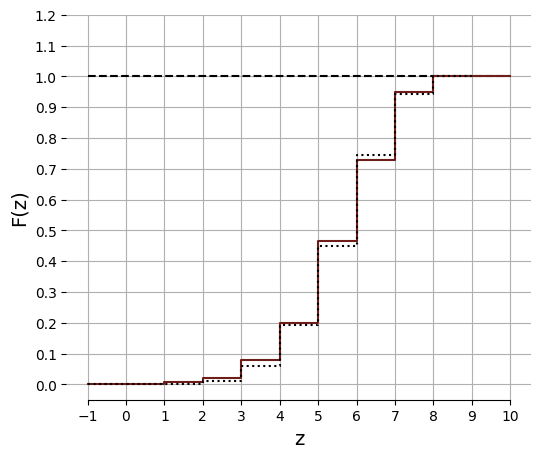

In [1112]:
kumProbs = [0] + [0] + kumProbs
buildCDF(X, 
         CDF, values, kumFreq, # эмпирическая
         kumProbs)             # теоретическая


In [1113]:
empirVals = []
theoretVals = []
diffs = []
print(f'значение: ', end='')
for i in range(0, k + 2):
    print(f'({i-1}, {i}]',end=', ')
    empirVal   = CDF(i, values, kumFreq)
    theoretVal = kumProbs[i + 1]
    diff = abs(empirVal - theoretVal)

    empirVals.append(empirVal)
    theoretVals.append(theoretVal)
    diffs.append(diff)

print(f'\nэмпир функция распр: {np.round(np.array(empirVals), PRECISION)}')
print(f'теор функция распр:  {np.round(np.array(theoretVals), PRECISION)}')
print(f'модуль разности:     {np.round(np.array(diffs), PRECISION)}')

D = max(diffs)
print(f'\nD = {D}')

значение: (-1, 0], (0, 1], (1, 2], (2, 3], (3, 4], (4, 5], (5, 6], (6, 7], (7, 8], (8, 9], 
эмпир функция распр: [0.      0.      0.00714 0.02143 0.07857 0.2     0.46429 0.72857 0.95
 1.     ]
теор функция распр:  [0.      0.00007 0.00129 0.01129 0.05797 0.1941  0.44823 0.7447  0.94235
 1.     ]
модуль разности:     [0.      0.00007 0.00585 0.01014 0.0206  0.0059  0.01606 0.01613 0.00765
 0.     ]

D = 0.02060377857142854


In [1114]:
# эмпирическая

# выборочное среднее
overlineX = np.round((1 / n) * np.sum(X), PRECISION)
m1 = np.mean(X)

# выборочная дисперсия
S2 = np.round(1 / (n - 1) * np.sum((X - overlineX)**2), PRECISION)

print(f'выборочное среднее: {overlineX} ({m1})')
print(f'выборочная дисперсия: {S2}')

# теоретическая

# мат ожидание
m = sum([i * probs[i] for i in range(k + 1)])

# дисперсия
d = sum([(i - m)**2 * probs[i] for i in range(k + 1)])

print(f'мат ожидание: {m}')
print(f'дисперсия: {d}')

выборочное среднее: 5.55 (5.55)
выборочная дисперсия: 1.90396
мат ожидание: 5.6
дисперсия: 1.68
